<a href="https://colab.research.google.com/github/bipinKrishnan/fastai_course/blob/master/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import models
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from tqdm.notebook import tqdm

In [34]:
path = '/content/bear/'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [35]:
!rm -r $path/.ipynb_checkpoints

In [36]:
def load_dataset(path=path, bs=1, transform=transform, train=True):
  imgs = ImageFolder(root=path, transform=transform)
  load_dataset.target = imgs.classes

  dataloader = DataLoader(imgs, bs, shuffle=train)

  return dataloader

def show_batch(dataloader, rows, cols):
  
  for i, (img, label) in enumerate(dataloader):
    plt.subplot(rows, cols, i+1)
    plt.imshow(np.transpose(img[0].numpy(), (1, 2, 0)))
    plt.title(load_dataset.target[label[0].item()])
    plt.xticks([])
    plt.yticks([])

    if i+1 >= (rows*cols):
      break

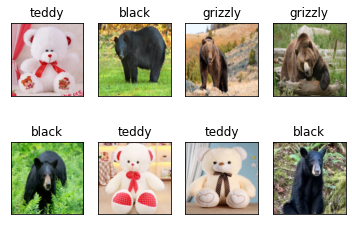

In [40]:
trainloader = load_dataset()
show_batch(trainloader, 2, 4)

In [41]:
model = models.resnet18(pretrained=True)

In [42]:
for params in model.parameters():
  params.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 3)

In [43]:
criterion = torch.nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

In [44]:
epochs = 50

model.train()
for epoch in tqdm(range(epochs), total=epochs):
  for img, label in trainloader:
    opt.zero_grad()

    out = model(img)

    loss = criterion(out, label)

    loss.backward()

    opt.step()
  
  print("Epoch: {}  Loss: {}".format(epoch+1, loss.item()))

Epoch: 1  Loss: 3.21663236618042
Epoch: 2  Loss: 0.8647440671920776
Epoch: 3  Loss: 1.3406903743743896
Epoch: 4  Loss: 1.5796202421188354
Epoch: 5  Loss: 7.800580024719238
Epoch: 6  Loss: 1.8948643207550049
Epoch: 7  Loss: 7.650057792663574
Epoch: 8  Loss: 2.967620849609375
Epoch: 9  Loss: 7.274129867553711
Epoch: 10  Loss: 1.6860930919647217
Epoch: 11  Loss: 4.057889938354492
Epoch: 12  Loss: 6.354366302490234
Epoch: 13  Loss: 0.8026861548423767
Epoch: 14  Loss: 5.864327430725098
Epoch: 15  Loss: 0.12357305735349655
Epoch: 16  Loss: 25.09230613708496
Epoch: 17  Loss: 11.574715614318848
Epoch: 18  Loss: 0.21102078258991241
Epoch: 19  Loss: 2.535712718963623
Epoch: 20  Loss: 0.05594258010387421
Epoch: 21  Loss: 0.1352466642856598
Epoch: 22  Loss: 0.16869303584098816
Epoch: 23  Loss: 0.1546231210231781
Epoch: 24  Loss: 0.3614133298397064
Epoch: 25  Loss: 2.948697566986084
Epoch: 26  Loss: 1.7698602676391602
Epoch: 27  Loss: 0.9880235195159912
Epoch: 28  Loss: 2.7749147415161133
Epoch: 29

In [47]:
def model_predict(img_path):
  transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
    ])
  
  test_img = Image.open(img_path)
  test_img = transform(test_img)
  
  return load_dataset.target[torch.max(model(test_img.unsqueeze(0)), 1)[1].item()]

In [50]:
test_img = '/content/bear/teddy/p-white-red-teddy-bear-7220-m.webp'
model_predict(test_img)

'teddy'